# EDA - Ecommerce Dataset

**Uma empresa internacional de comércio eletrônico(E-commerce)que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.** 

**Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do mundo.**  

**Os  produtos  são  enviados  de  Navio,  Avião  ou  Caminhão,  dependendo  da  região  de entrega.Em cada compra o cliente pode receber um desconto dependendo do peso do produto comprado.** 

**Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de compra.** 

**O único dado pessoal sobre o cliente que está disponível é o gênero.**

**Fonte dos dados: Serão utilizados dados fictícios que representam dados reais de uma empresa de E-Commerce.**

## Imports, Ignorando Warnings e Configurando Parâmetros do Matplotlib 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython. display import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Descrição das Colunas do Dataset

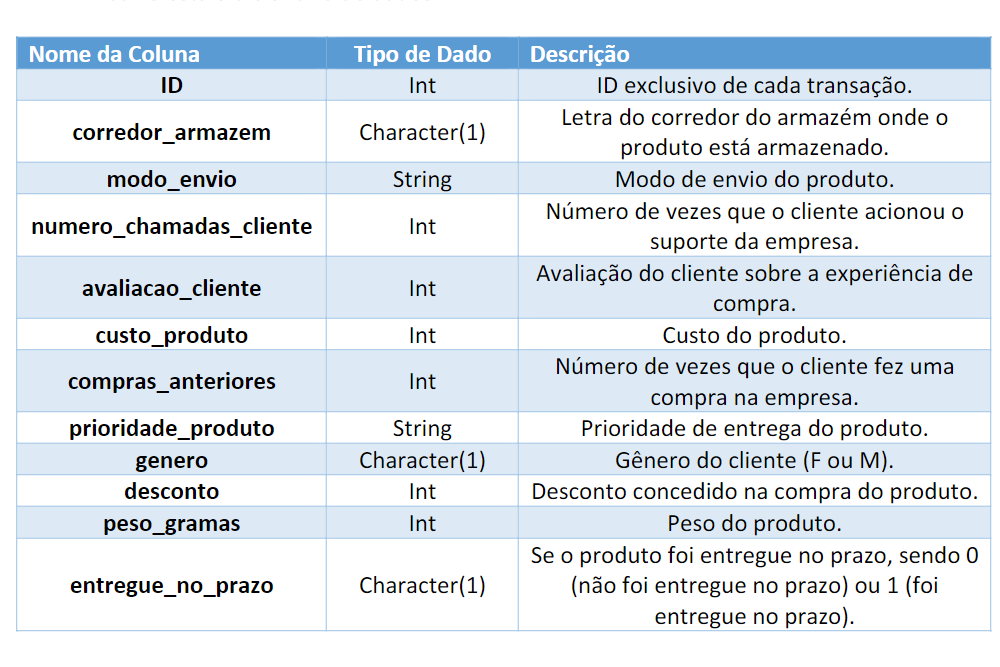

In [3]:
Image("colunas dataset.png")

## Carregando o Dataset

In [4]:
df = pd.read_csv('dados/dataset.csv')

In [5]:
df.shape

(11000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [8]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
5710,5711,C,Navio,4,1,134,3,media,M,7,4933,1
5061,5062,B,Caminhao,4,2,222,3,baixa,M,4,5919,0
3735,3736,B,Navio,6,1,170,3,baixa,F,10,4858,0
3838,3839,C,Aviao,4,1,190,4,media,F,5,5570,1
10587,10588,B,Navio,3,5,166,3,media,F,9,5275,1


In [9]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


# EDA -Parte 1

In [10]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

**Vamos separar as colunas por tipo (categóricas e numéricas)**

In [11]:
cats = ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

In [12]:
nums = ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'desconto', 'peso_gramas']

In [13]:
target = df["entregue_no_prazo"]

## Explorando as Variáveis Numéricas

In [14]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


1- Aparentemente, não há missing values em nenhuma coluna (investigações mais profundas a serem realizadas) 

2- Pode-se observar que as colunas **numero_chamadas_cliente**, **avaliacao_cliente** e **custo_produto** aparentam ter uma distribuição simétrica (média e mediana têm valores bem próximos)

3- As colunas **compras_anteriores** e **desconto** aparentam ter uma inclinação à direita (média maior que a mediana)

4- A coluna **peso_gramas** aparenta ter uma inclinação à esquerda (média menor que a mediana)

<AxesSubplot:>

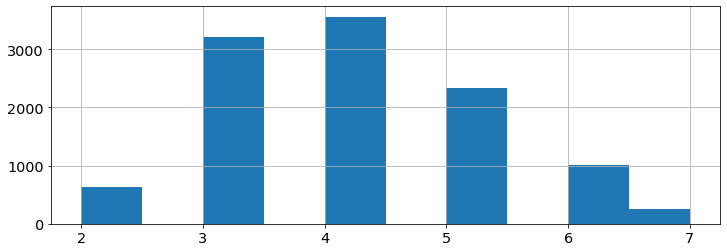

In [15]:
df["numero_chamadas_cliente"].hist()

<AxesSubplot:>

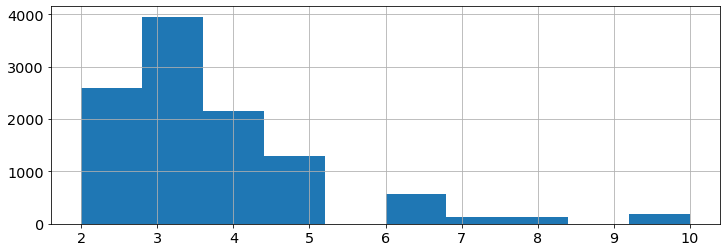

In [16]:
df['compras_anteriores'].hist()

<AxesSubplot:>

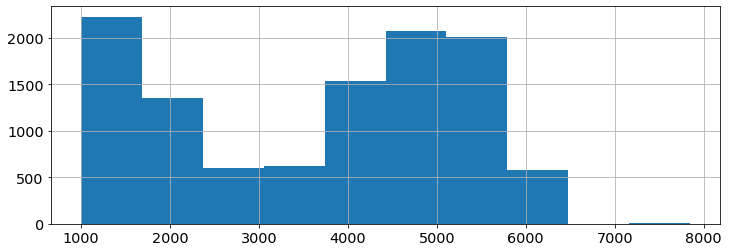

In [17]:
df['peso_gramas'].hist()

## Explorando as Variáveis Categóricas

In [18]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Novamente, há a aparência de que não há missing values em nenhuma variável

In [19]:
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



## Análise Univariada - Box Plots

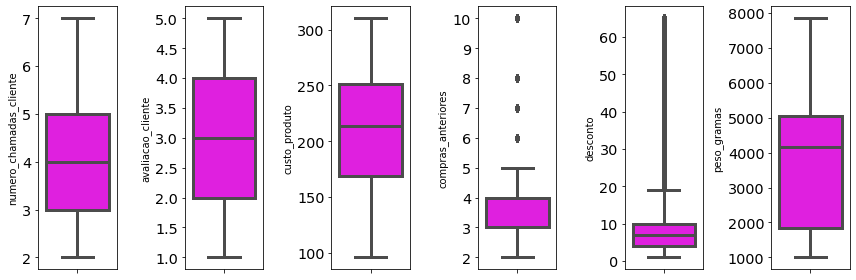

In [20]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

Aqui, observa-se que a variável `compras_anteriores` possui alguns outliers e que a variável `desconto` possui muitos outliers.

Ambos os casos, serão tratados em breve

## Análise Univariada - Dist Plot

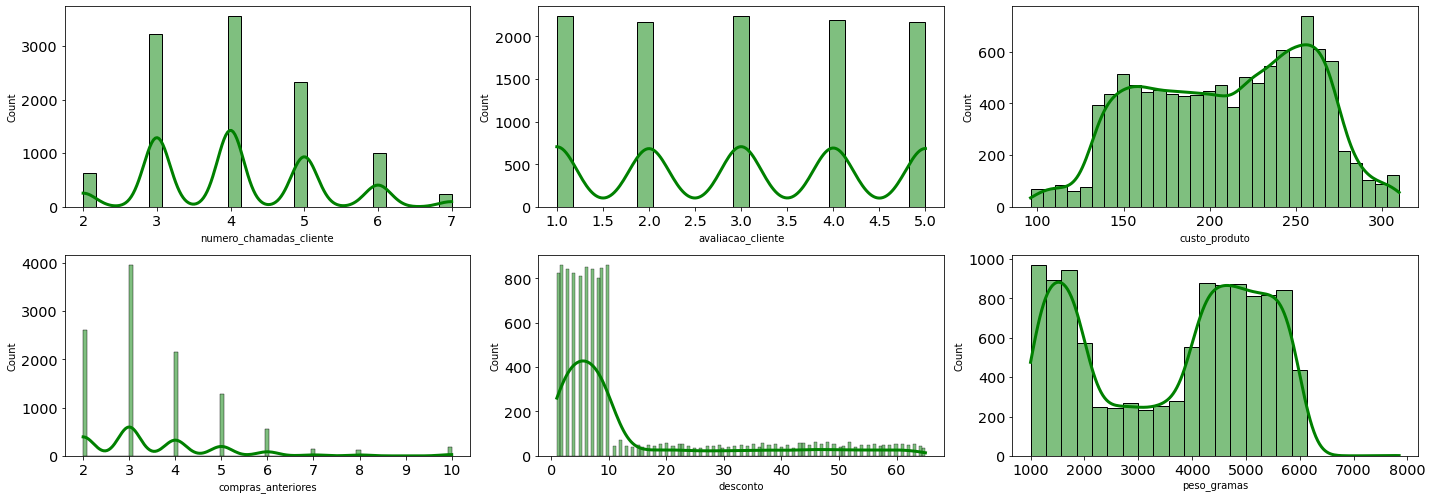

In [21]:
features = nums
plt.figure(figsize = (20,10))
for i in range (0, len(nums)):
    plt.subplot(3, len(nums)/2, i + 1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

As variáveis `numero_chamadas_clientes` e `avaliacao_cliente` estão distribuídas de maneira uniforme

A variável `custo_produto` parece estar próxima de uma distribuição normal

Para a variável `peso_gramas`, há incerteza de distribuição devido ao formato de U

As variáveis `compras_anteriores` e `desconto` estão ligeiramente inclinadas

## Análise Univariada - Violin Plot

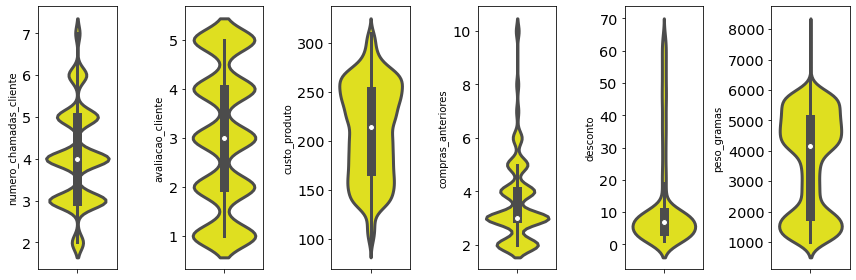

In [22]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'yellow', orinet = 'v')
    plt.tight_layout()

## Análise Univariada - Count Plot (Categóricas)

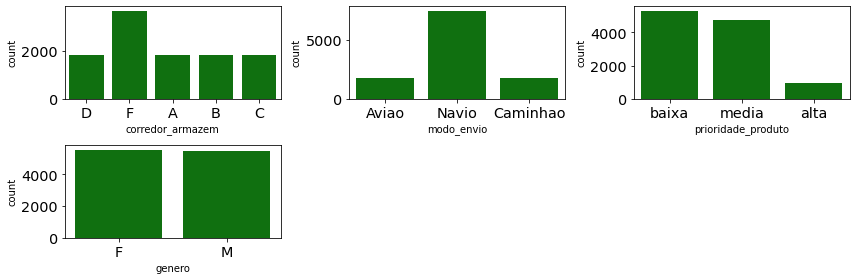

In [23]:
for i in range(0,len(cats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = df[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

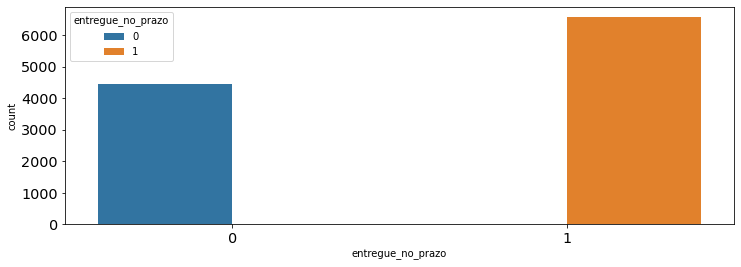

In [24]:
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

Observando os gráficos, pode-se observar que:

- A maioria dos produtos enviados são do corredor **F**
- O modo de envio mais comum é **Navio**
- Há poucos produtos com prioridade de entrega **Alta**
- A proporção de clientes dos sexos **Masculino** e **Feminino** é praticamente a mesma
- a coluna `entregue_no_prazo` é binária

## Análise Bivariada - Mapa de Correlação

In [25]:
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [26]:
corr_df = df[nums].corr()

<AxesSubplot:>

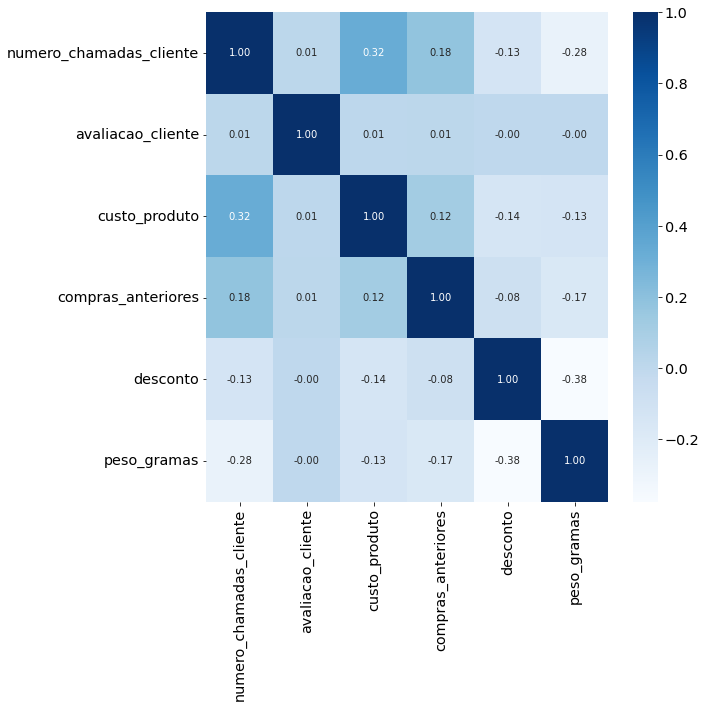

In [27]:
plt.figure(figsize = (9,9))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

Observações:

- Há uma correlação **positiva** entre `numero_chamadas_cliente` e `custo_produto`
- Há uma correlação **positiva** entre `numero_chamadas_cliente` e `compras_anteriores`
- Há uma correlação **negativa** entre `desconto` e `peso_gramas`
- Há uma correlação fraca entre as demais variáveis


## Análise Bivariada - Pair Plot

<Figure size 1080x1080 with 0 Axes>

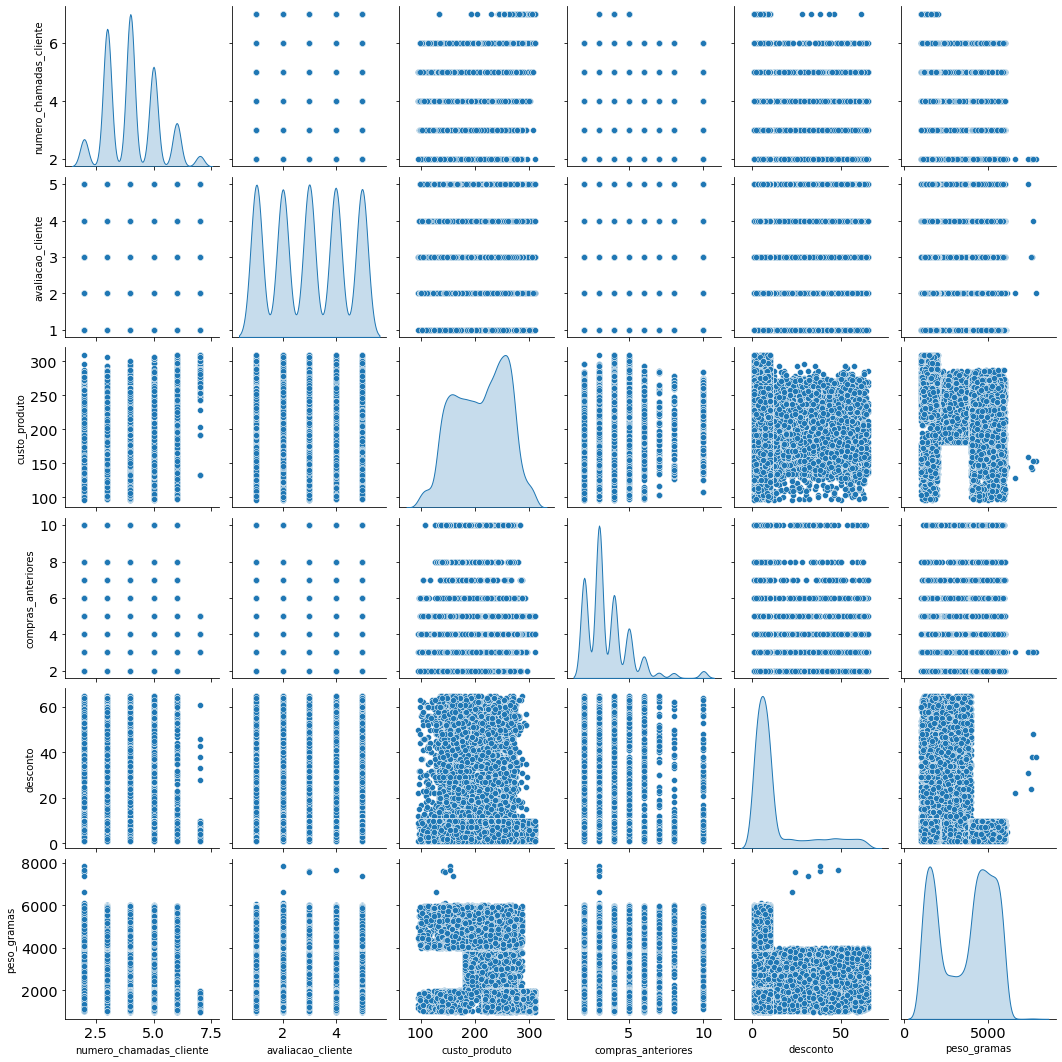

In [28]:
plt.figure(figsize = (15,15))
sns.pairplot(df[nums], diag_kind = 'kde')

## Colunas Categóricas x Variável Target

In [29]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

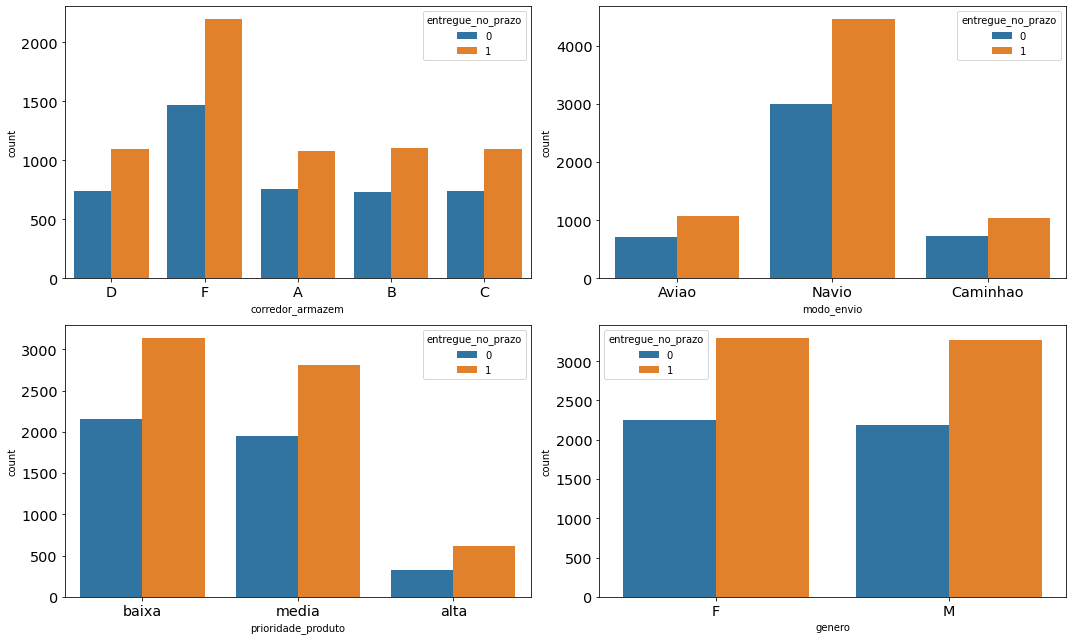

In [30]:
plt.figure(figsize = (15,9))
features = cats
for i in range(len(features)):
    plt.subplot(2,2,i+1)
    sns.countplot(data = df, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Observações:

* Envio por navio tende a apresentar atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor F tendem a apresentar atraso na entrega.
* Produtos comprados por mulheres tem um volume ligeiramente maior de entregas feitas no prazo.

## Conclusão da Parte 1 da EDA:

Algumas das coisas que encontramos neste conjunto de dados são:

* Os dados parecem válidos e não há defeitos maiores/significativos.

* Existem algumas distribuições que são um pouco *assimétricas*, o que deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal.

* Não detectamos problemas de multicolinearidade.

* Algumas variáveis parecem completamente não correlacionados.

* Das variáveis categóricoa, `modo_envio` , `corredor_armazem` e `importancia_produto` parecem úteis para prever a variável target.

# EDA - Parte 2

## 1- Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

In [31]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [32]:
df["modo_envio"].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [33]:
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID': 'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [34]:
df_group2 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [35]:
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [36]:
df_group4 = df.groupby('modo_envio').agg({'ID': 'nunique'}).reset_index()
df_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [37]:
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [38]:
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

In [39]:
df_group5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


In [40]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

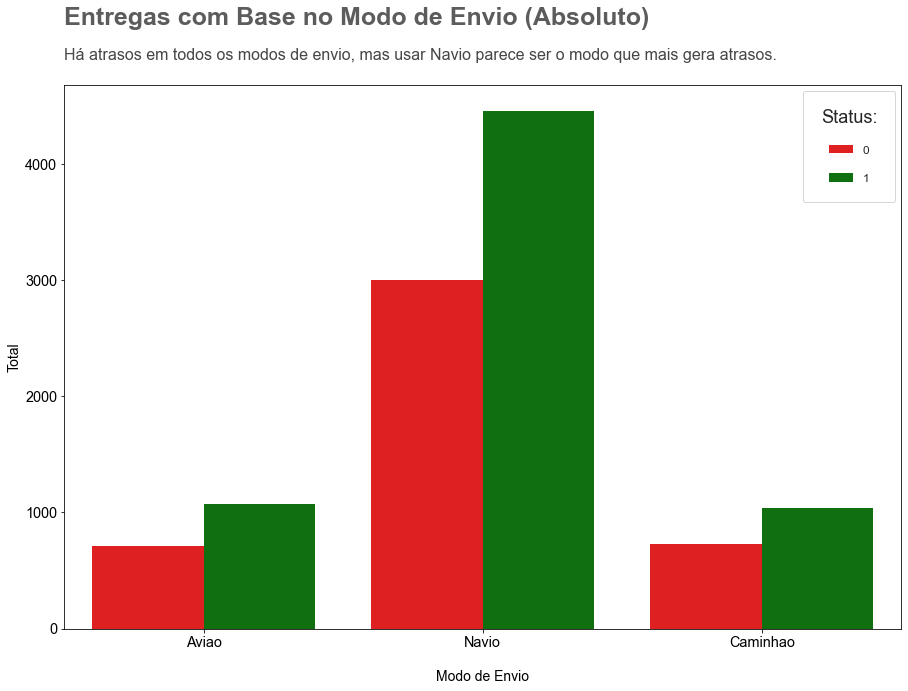

In [41]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df, 
                      x = 'modo_envio', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

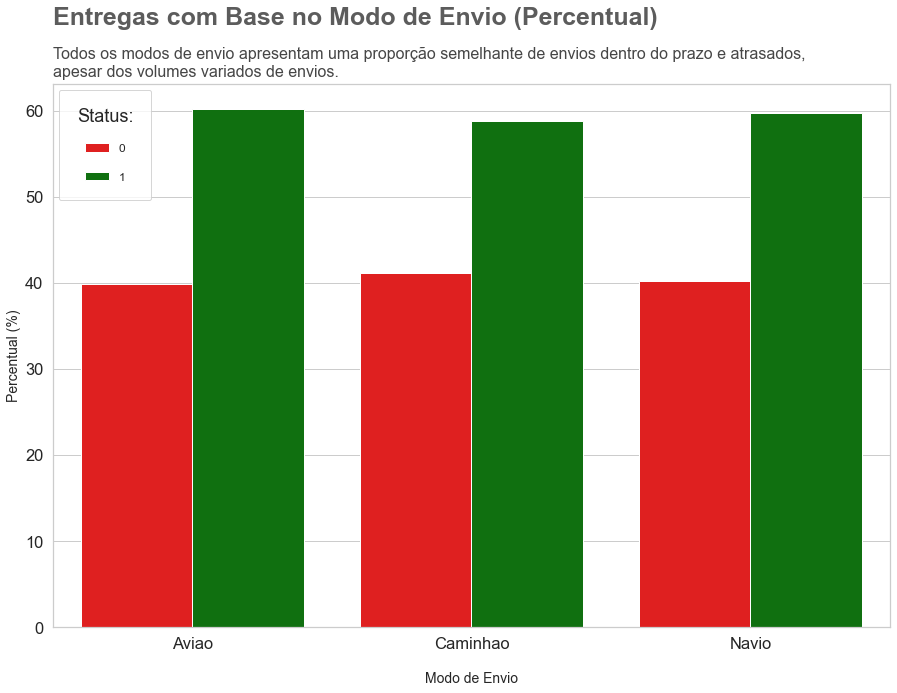

In [42]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

### 2- Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [43]:
df_group11 = df.groupby(['entregue_no_prazo','prioridade_produto']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [44]:
df_group12 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [45]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [46]:
df_group14 = df.groupby('prioridade_produto').agg({'ID' : 'nunique'}).reset_index() 
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [47]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [48]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [49]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


In [50]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

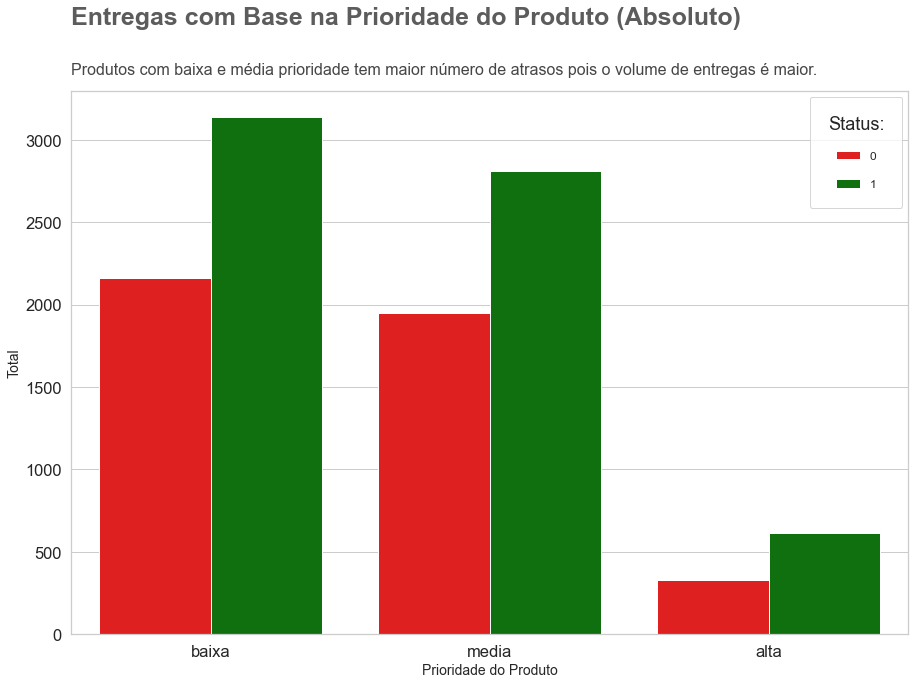

In [51]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

In [52]:
df_group15.columns

Index(['Status de Entrega no Prazo', 'Prioridade do Produto',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

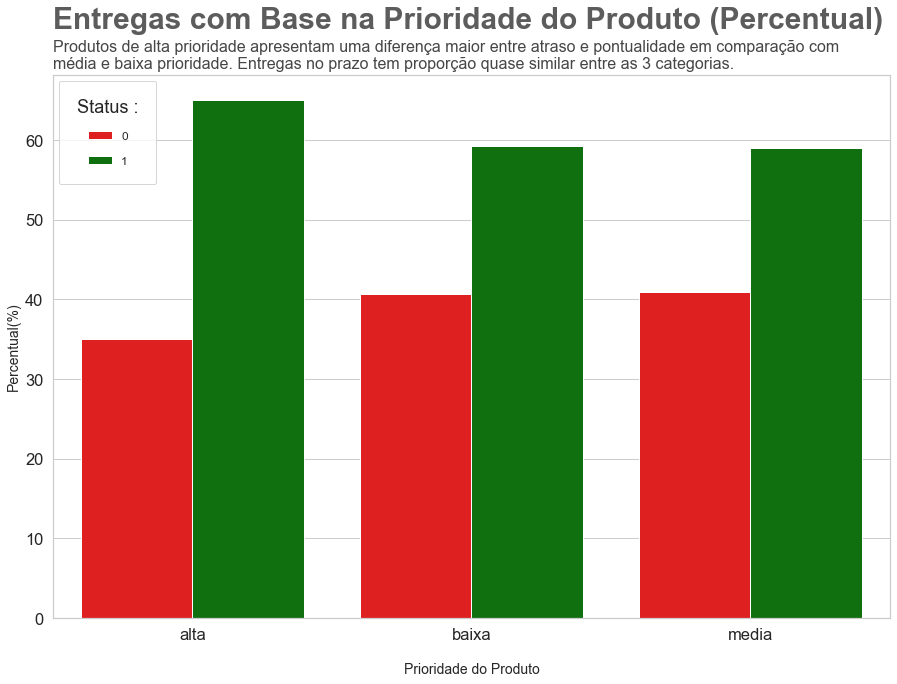

In [53]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

### 3- Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [54]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [55]:
df_group21 = df.groupby(['entregue_no_prazo', 'corredor_armazem']).agg({'ID': 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [56]:
df_group22 = df.groupby('corredor_armazem').agg({'ID': 'nunique'}).reset_index()
df_group22

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [57]:
df_group23 = df_group21.merge(df_group22, on = 'corredor_armazem')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [58]:
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


In [59]:
df_group23.columns = [['Status de Entrega no Prazo', 'Corredor do Armazem', 'Total Por Categoria', 'Total Geral','Percentual(%)']]

In [60]:
df_group23.iloc[range(0,10,2)]

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
2,0,B,729,1833,39.770867
4,0,C,740,1834,40.348964
6,0,D,738,1834,40.239913
8,0,F,1472,3666,40.152755


**Percebe-se que as taxas de produtos atrasados são praticamente iguais para todos os corredores do armazém, sendo A o corredor com um valor ligeiramente maior**

### Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?



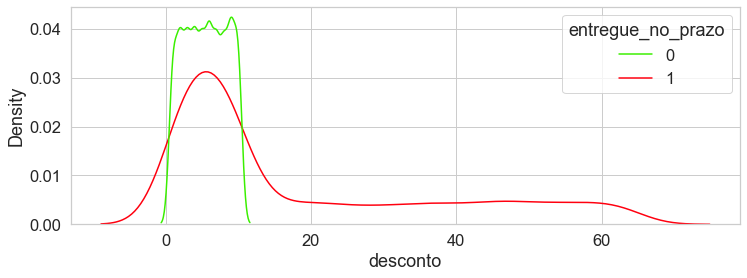

In [61]:
sns.kdeplot(data = df, x = 'desconto', hue = 'entregue_no_prazo');

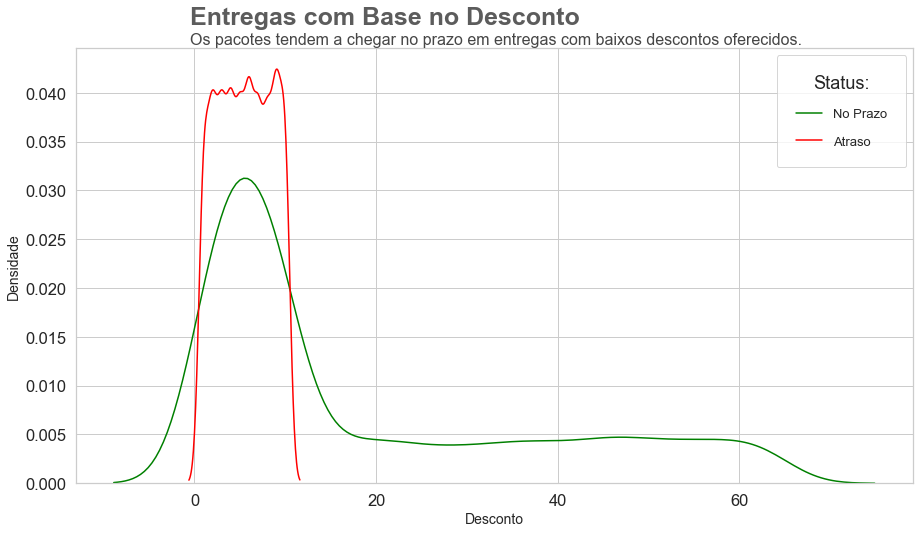

In [62]:
# Resposta com gráfico formatado
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);